In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def softmax(matrix):
    return np.exp(matrix)/np.sum(np.exp(matrix), axis = 1).reshape(len(matrix[:,0]),1)

In [7]:
data = pd.read_csv('fashion-mnist_train.csv').as_matrix()

/home/donald/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [8]:
def oneHotEncode(matrix, columns):
    for column in columns:
        uniques = np.unique(matrix[:,column])
        newmat = np.zeros((len(matrix[:,column]),len(uniques)))

        for i in range(0,len(matrix[:,column])):
            for j in range(0,len(uniques)):
                if(matrix[i,column] == uniques[j]):
                    newmat[i,j] = 1
        matrix = np.column_stack((matrix,newmat))
    try:
        matrix = np.delete(matrix,columns,axis = 1).astype(float)
    except:
        matrix = np.delete(matrix,columns,axis = 1)
    return matrix
newdata = oneHotEncode(data,[0])

In [9]:
def TVTsplit(matrix, train = .7):
    #     This function's purpose is to split a given matrix
    #     into three parts: train, test, and validate. The 
    #     train parameter is the percentage of the data that
    #     goes into training 70% by default. The val parameter
    #     determines how much goes into the validation set
    #     15% by default. The rest of the data goes into
    #     the test set.
    
#     The following is needed to perform the operations
#     in the calculations in here.
    import numpy as np
    # The following does some common sense things like
    # telling you that train and val need to add up to less
    # than 1.

    if(train > .99):
        print("Splitting failed. Please make sure that train is less than .99 so that test and val have enough data.")
        return 0
    
#     These two things calculate the subset lengths that 
#     are needed for the subsetting.
    splitnum = int(len(matrix[:,0])*train)
    splitnum2 = int((len(matrix[:,0]) - splitnum)/2)
#     np.random.shuffle(matrix)

#     The next three separate the data into the three sets
#     using the splitnums from above.
    Train = matrix[0:splitnum,]
    Test = matrix[splitnum:(splitnum+splitnum2),]
    Val = matrix[(splitnum+splitnum2):,]
    return Train, Val, Test

In [10]:
train,val,test = TVTsplit(newdata)

In [11]:
Ytrain = train[:,(len(train[0,])-10):]
Xtrain = train[:,:(len(train[0,])-10)]
Yval = val[:,(len(val[0,])-10):]
Xval = val[:,:(len(val[0,])-10)]
Ytest = test[:,(len(test[0,])-10):]
Xtest = test[:,:(len(test[0,])-10)]

In [12]:
def asnumeric(x):
    return list(map(float,x))

Xtrain = np.matrix(list(map(asnumeric,Xtrain.T))).T
Xval = np.matrix(list(map(asnumeric,Xval.T))).T
Xtest = np.matrix(list(map(asnumeric,Xtest.T))).T

In [13]:
trainmins = np.array(list(map(np.nanmin,Xtrain.T)))
trainmaxs = np.array(list(map(np.nanmax,Xtrain.T)))

In [14]:
for i in range(0,784):
    Xtrain[:,i] = (Xtrain[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xval[:,i] = (Xval[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])
    Xtest[:,i] = (Xtest[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])


0.9694


0.8205555555555556

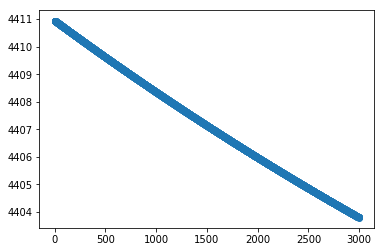

In [333]:
# w = np.random.randn(784*10)
# w = np.matrix(w).reshape(784,10)
inds = []

# for i in range(0)
cost = []
# wbest = w
w = wbest
# errbest = 100000
for i in range(0,3000):
    w = w - .0000055*Xtrain.T@(softmax(Xtrain@w) - Ytrain)
    CEC = -np.sum(np.multiply(Yval,np.log(softmax(Xval@w))))
    inds.append(i)
    cost.append(CEC)
    if(CEC<errbest):
        errbest = CEC
        wbest = w
plt.scatter(inds,cost)
print(np.mean(np.rint(softmax(Xval@w)) == Yval))
np.sum(np.multiply(np.rint(softmax(Xval@w)),Yval))/np.sum(Yval)

In [53]:
testdata = pd.read_csv('fashion-mnist_test.csv').as_matrix()

FileNotFoundError: File b'fashion-mnist_test.csv' does not exist

In [335]:
newtestdata = oneHotEncode(testdata,[0])

In [336]:
Ynew = newtestdata[:,(len(newtestdata[0,])-10):]
Xnew = newtestdata[:,:(len(newtestdata[0,])-10)]

In [338]:
Xnew = np.matrix(list(map(asnumeric,Xnew.T))).T

In [339]:
for i in range(0,784):
    Xnew[:,i] = (Xnew[:,i] - trainmins[i])/(trainmaxs[i]-trainmins[i])

In [343]:
print(np.mean(np.rint(softmax(Xnew@w)) == Ynew))
np.sum(np.multiply(np.rint(softmax(Xnew@w)),Ynew))/np.sum(Ynew)

0.96996


0.8235

In [15]:
from MyML import *

In [16]:
help(TSNN)

Help on class TSNN in module MyML.TSNN:

class TSNN(builtins.object)
 |  TSNN(nodes=[5, 3, 6, 3], indims=2, activation='tanh', taskType='regression')
 |  
 |  Methods defined here:
 |  
 |  __init__(self, nodes=[5, 3, 6, 3], indims=2, activation='tanh', taskType='regression')
 |      Initialize self.  See help(type(self)) for accurate signature.
 |  
 |  predict(self, X)
 |  
 |  train(self, X, Y, Xval=[], Yval=[], epochs=100, lr=1e-05)
 |  
 |  weightInitialization(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



In [22]:
nnmodel = TSNN(indims = 784,nodes = [40,10], activation = 'relu', taskType = 'c')

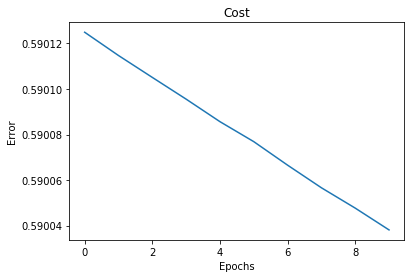

In [66]:
nnmodel.train(Xtrain,Ytrain, Xval,Yval, epochs = 10, lr = .0000005)

In [67]:
print(np.mean(nnmodel.predict(Xtest) == Ytest))
np.sum(np.multiply(nnmodel.predict(Xtest),Ytest))/np.sum(Ytest)

0.9576222222222223


0.7881111111111111